In [0]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error as mae

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('airmiles.csv')

df.head()

,time,airmiles
0,1937,412
1,1938,480
2,1939,683
3,1940,1052
4,1941,1385


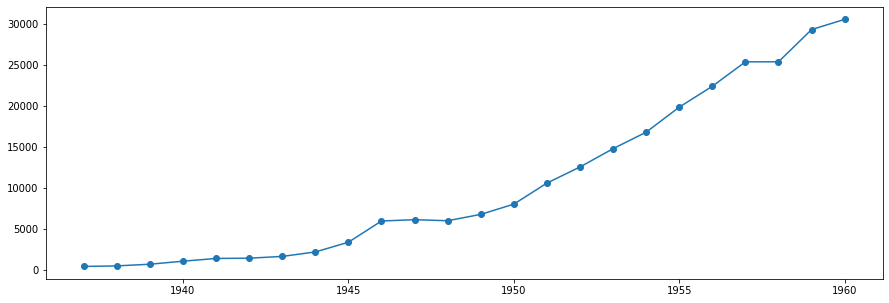

In [0]:
plt.figure(figsize=(15, 5))
plt.plot( df.time, df.airmiles, 'o-' );

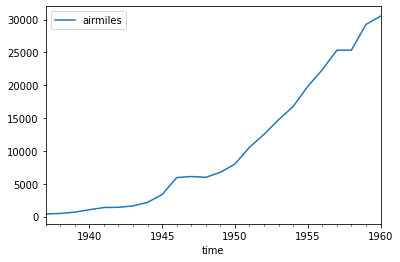

In [0]:
df = pd.read_csv('airmiles.csv', parse_dates=['time'], index_col='time')
df[ ['airmiles'] ].plot();

In [0]:
df.head()

,airmiles
time,
1937-01-01,412
1938-01-01,480
1939-01-01,683
1940-01-01,1052
1941-01-01,1385


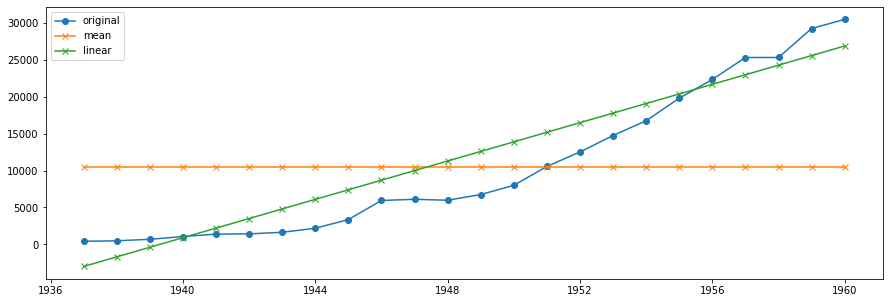

In [0]:
def linear_func(airmiles, k=None, b=0):
  mean_value = np.mean(airmiles)
  if k is None:
      #  for each forecast value the same value is returned, which is the average value
      return [mean_value] * len(airmiles) 
  
  return [idx*k+b for idx, _ in enumerate(airmiles)]


plt.figure(figsize=(15, 5))
plt.plot( df.index, df.airmiles, 'o-', label='original' );
plt.plot( df.index, linear_func(df.airmiles), 'x-', label='mean' );
plt.plot( df.index, linear_func(df.airmiles, k=1300, b=-3000), 'x-', label='linear' );

plt.legend();

# ***Success metric***

In [0]:
print('mean' , mae( df.airmiles, linear_func(df.airmiles)))
print('linear' , mae( df.airmiles, linear_func(df.airmiles, k=1300, b=-3000)))

mean 8499.305555555557
linear 2935.0833333333335
